<a href="https://colab.research.google.com/github/j-river1/AEPS_Sigatoka/blob/master/Copy_of_PRACTICA_DEEPLEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.875 · Deep Learning · Práctica</p>
<p style="margin: 0; text-align:right;">2019-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Sistema automático para la detección de COVID-19 en radiografías

Una de las aplicaciones de AI es el procesamiendo de imágenes médicas. En particular, el uso de radiografías para una detección no invasiva y rápida del Covid-19 puede resultar extremadamente útil para ayudar y agilizar la tarea del personal médico [1][2].

En este proyecto desarrollaremos un detector *Deep Learning* de Covid-19 en radiografías. Para ello, utilizaremos las imágeners de la base de datos "Covid-chestxray-dataset" [3], generada por unos investigadores del grupo de investigación [Mila](https://mila.quebec/en/) y de la Universidad de Montreal [4]. También utilizaremos imágenes de radiografías de pacientes sanos y con neumonía bacterial extraídas de la competición de Kaggle "Chest X-Ray Images (Pneumonia)" [5].

En total, disponemos de una cantidad de 426 imágenes, divididas en conjuntos de entrenamiento (339 imágenes), validación (42 imágenes) y test (45 imágenes).

Las particiones se dan en listas ".txt", en las que a cada imagen se le asigna una etiqueta:
- 0) Healthy
- 1) Covid-19
- 2) Pneumonia

El objetivo consisten en desarrollar un sistema basado en redes neuronales capaz de clasificar correctamente las imágenes en estas 3 categorías.

**<u>Nota</u>**: Los resultados obtenidos por los modelos entrenados en esta base de datos son puramente para finalidades educativas y no se pueden utilizar para un diagnóstico real sin validación clínica.

#### Referencias
1. María Climent, 2020 [Covid-19: La Inteligencia Artificial De La Española Quibim Puede Acelerar El Diagnóstico Del Coronavirus](https://innovadores.larazon.es/es/esta-inteligencia-artificial-espanola-puede-acelerar-el-diagnostico-del-coronavirus/)
2. Angel Alberich-bayarri,2020 [Imagin, AI and Radiomix to understand and fight Coronavirus Covid-19](https://quibim.com/2020/02/14/imaging-ai-and-radiomics-to-understand-and-fight-coronavirus-covid-19/)
3. [Ieee8023/covid-chestxray-dataset](https://github.com/ieee8023/covid-chestxray-dataset)
4. Cohen, J.P., Morrison, P. and Dao, L., 2020. [COVID-19 image data collection](https://arxiv.org/pdf/2003.11597.pdf).
5. Paul Mooney, 2019 [Chest X-ray Images (pneumonia)](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)


#### Lecturas recomendadas
6. Souradip Chakraborty, 2020. [Detection Of Covid-19 Presence from Chest X-ray Scans Using Cnn & Class Activation Maps](https://towardsdatascience.com/detection-of-covid-19-presence-from-chest-x-ray-scans-using-cnn-class-activation-maps-c1ab0d7c294b)

7. Cohen, J.P., Hashir, M., Brooks, R. and Bertrand, H., 2020. [On the limits of cross-domain generalization in automated X-ray prediction](https://arxiv.org/pdf/2002.02497.pdf)

8. Karim, M., Döhmen, T., Rebholz-Schuhmann, D., Decker, S., Cochez, M. and Beyan, O., 2020. [Deepcovidexplainer: Explainable covid-19 predictions based on chest x-ray images](https://arxiv.org/pdf/2004.04582.pdf).

9. Wang, L., Wong, A. (2020). [COVID-Net: A Tailored Deep Convolutional Neural Network Design for Detection of COVID-19 Cases from Chest Radiography Images](https://arxiv.org/abs/2003.09871)

10. Zhou, B., Khosla, A., Lapedriza, A., Oliva, A. and Torralba, A., 2016. [Learning deep features for discriminative localization](https://arxiv.org/pdf/1512.04150.pdf). In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 2921-2929).

11. Mordvintsev, A., Olah, C. and Tyka, M., 2015. [Inceptionism: Going deeper into neural networks](https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html).

# Preparación del Dataset (3 puntos)

En este primer apartado se analizarán las imágenes de la base de datos y se disñará un *pipeline* para cargar las imágenes y prepararlas para la red neuronal.

Se deberán tener en cuenta factores como:
- Tamaño de entrada de las imágenes
- Normalización de las imágenes
- Visualizaciones de algunas muestras de cada categoría
- Técnicas de *data augmentation* para aumentar el tamaño del conjunto de entrenamiento

Y, en general, cualquier técnica que consideréis que pueda mejorar la implementación y resultados de este proyecto.

## Solución

Esta solución esta basada en las librerias creadas en **Keras** [1] para el tratamiento de las imagenes.


1. **Preprocesamiento**

Para la lectura de las imagenes se utilizó la función **image_dataset_from_directory** por lo tanto se crearon  las carpetas para guardar las imagenes.  Las estructura de estas carpetas se muestra en la figura [2]. Este diseño esta compuesto por tres carpetas: training, testing y validation, y para cada una de estas carpetas tiene tres subcarpetas para cada uno de los tipo de imagenes COVID-19, NEUNOMIA y HEALTHY. Esta clasificación tomó la codificacion suministrada en los archivos dados para la practica testing.txt, training.txt y validation.txt.



----------------------------------------------

/Main Directory/trainig

....................................../COVID19  

....................................../NEUNOMIA

....................................../HEALTHY 

......................../trainig

....................................../COVID19  

....................................../NEUNOMIA

....................................../HEALTHY 

......................../validation

....................................../COVID19  

....................................../NEUNOMIA

....................................../HEALTHY 

------------------------------------------------------------------
**figura [2]**










A continuación se crea la conexión con la base de datos donde están las imagenes.

In [0]:
# Conexion con las carpetas que contiene las imagenes.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


2. **Tamaño de las imagenes** 

Las imagenes tienen diferentes tamaños para  las tres categorias  y por lo tanto se fijo el tamaño estándar  de 224 x 224, que es el más utilizado para CNN. 

3. **Normalización de las imágenes**

Para la normalización de las imágenes se utilizó la clase de **ImageDataGenerator** de Keras y también para las tecnicas *data augmentation*.

Esta clase se tiene tres opciones para *pixel scaling* [2]:

1. *Pixel Normalization*. Convierte la escala de pixeles en un rango de 0 a 1. 
2. *Pixel Centering*. Convierte la escala de pixeles en un rango donde el valor medio es 0.
3. *Pixel Standarization*. Convierte la escala de pixeles en un rango donde el valor medio es igual a cero y con varianza igual a 1.

Como se menciona en [3], lo más recomendable para la normalización de los datos en *deep learning* es convertirlas a un rango de 0 a 1. Por lo tanto, las imagenes se convierte con *Pixel Normalization* fijando el parametro ***rescale*** igual a 1./255.

4. **Visualizaciones de algunas muestras de cada categoría**

A continuación se presenta algunas las imagenes por cada categoria.

4.1 **COVID-19**

Las siguientes radiografias corresponden a pulmones infectados con COVID19, estas presentan pequeñas manchas blancas, probablemente se debe a la reducción de la capacidad de intercambio de gases ya que los alveolos son llenados con fluidos altos proteinas cuando son atacados por el SARS-CoV-2 [5]. 

Además, estas imagenes tienen un color blanco más intenso en todo el torso que no permiten ver otros organos, como es el corazón. De acuerdo a [3], la parte derecha inferior son las partes más importantes para la deteccion del COVID-19 en las imagenes en los pulmones.

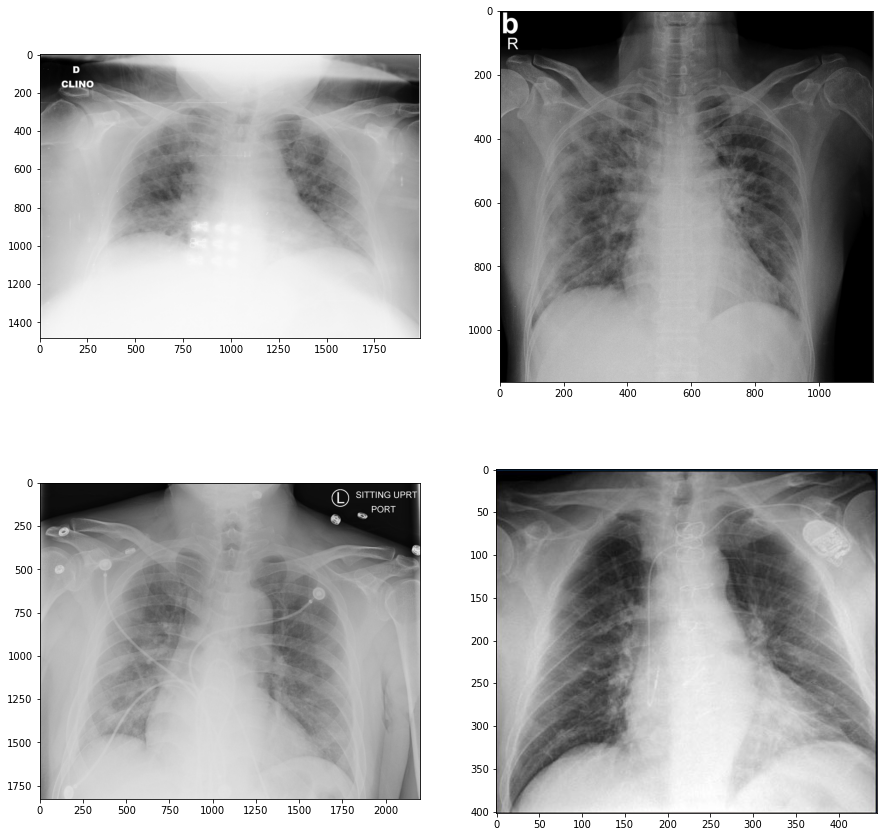

In [0]:
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator, image, img_to_array, load_img

import matplotlib.pyplot as plt
import numpy as np


img_COV1 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_COVID-19/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')
img_COV2 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_COVID-19/1-s2.0-S0929664620300449-gr2_lrg-b.jpg')
img_COV3 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_COVID-19/16654_2_1.jpg')
img_COV4 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_COVID-19/AR-2.jpg')


plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(img_COV1)
plt.subplot(222)
plt.imshow(img_COV2)
plt.subplot(223)
plt.imshow(img_COV3)
plt.subplot(224)
plt.imshow(img_COV4)



4.2  **HEALTHY**

En las siguientes radiografias se muestran un ejemplo de pulmones saludables. En las radiografias están los pulmones en forma de ovalos, con un tamaño  similar a la caja toracica y con un negro intenso. Tambien se puede detercar los diagracmas (estos se encuentran en la parte inferior de las costillas). De las misma manera que los huesos de la parte superior como es la clavicula.

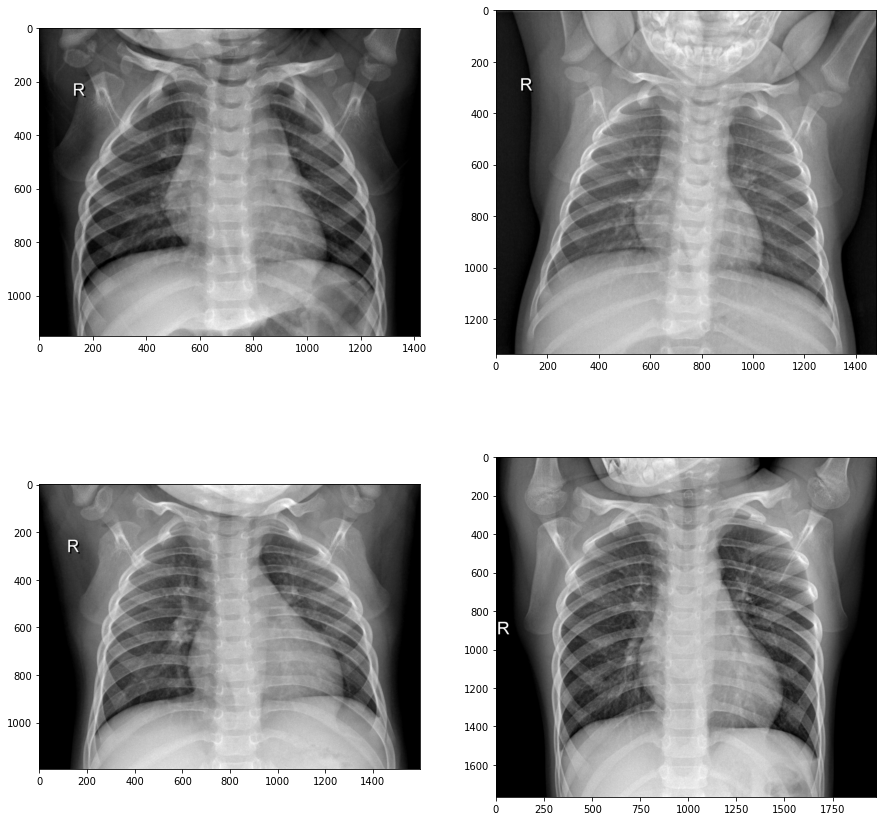

In [0]:
img_HE5 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_HEALTHY/IM-0117-0001.jpeg')
img_HE6 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_HEALTHY/IM-0423-0001.jpeg')
img_HE7 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_HEALTHY/IM-0622-0001-0001.jpeg')
img_HE8 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_HEALTHY/NORMAL2-IM-0408-0001.jpeg')



plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(img_HE5)
plt.subplot(222)
plt.imshow(img_HE6)
plt.subplot(223)
plt.imshow(img_HE7)
plt.subplot(224)
plt.imshow(img_HE8)

4.3 **PNEUMONIA**

En las siguientes imagenes de los pulmones con pneumonia se observa un color más intenso de blanco por todos los pulmones. Adicionalmente, se percibe una aumento del tamaño de los pulmones ya que los alveolos son llenados con pus o con fluidos altos en proteinas, que ocasiona dificultad para respirar [8].


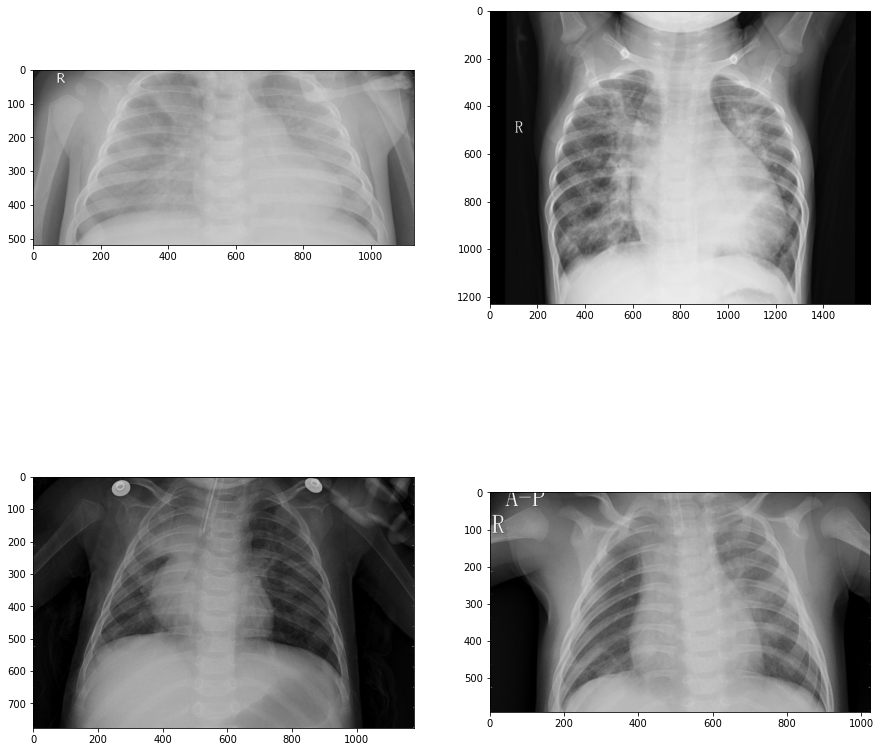

In [0]:
img_Neu9 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_PNEUMONIA/person1011_bacteria_2942.jpeg')
img_Neu10 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_PNEUMONIA/person1135_bacteria_3077.jpeg')
img_Neu11 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_PNEUMONIA/person1502_bacteria_3928.jpeg')
img_Neu12 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_PNEUMONIA/person1581_bacteria_4135.jpeg')


plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(img_Neu9)
plt.subplot(222)
plt.imshow(img_Neu10)
plt.subplot(223)
plt.imshow(img_Neu11)
plt.subplot(224)
plt.imshow(img_Neu12)

4.4 **Comparación entre HEALTHY, COVID19 y PNEUMONIA**

En las siguientes imagenes están las imagenes de la tres categorias. En las figuras se puede observar que los pulmones que son HEALTHY son muy diferentes a los COVID19 y PNEUMONIA pero los PNEUMONIA y COVID son muy similares. Por lo tanto se puede preveer que la detección de COVID19 y PNEUMONIA será una tarea dificil para el modelo. 

Text(0.5, 1.0, 'COVID-19 Ejemplo 3')

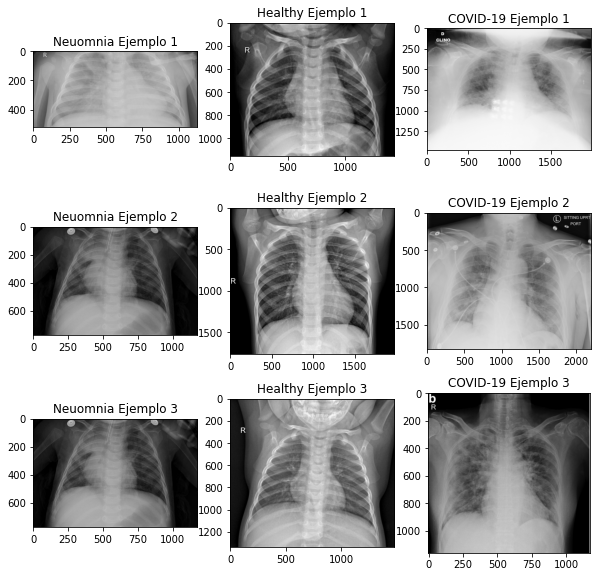

In [0]:
plt.figure(figsize=(10, 10))

plt.subplot(331)
plt.imshow(img_Neu9)
plt.title('Neuomnia Ejemplo 1')

plt.subplot(332)
plt.imshow(img_HE5)
plt.title('Healthy Ejemplo 1')

plt.subplot(333)
plt.imshow(img_COV1)
plt.title('COVID-19 Ejemplo 1')


plt.subplot(334)
plt.imshow(img_Neu11)
plt.title('Neuomnia Ejemplo 2')


plt.subplot(335)
plt.imshow(img_HE8)
plt.title('Healthy Ejemplo 2')

plt.subplot(336)
plt.imshow(img_COV3)
plt.title('COVID-19 Ejemplo 2')

plt.subplot(337)
plt.imshow(img_Neu11)
plt.title('Neuomnia Ejemplo 3')


plt.subplot(338)
plt.imshow(img_HE6)
plt.title('Healthy Ejemplo 3')

plt.subplot(339)
plt.imshow(img_COV2)
plt.title('COVID-19 Ejemplo 3')




5. **Técnicas de data augmentation**

Las técnicas de *data augmentation* tiene como objetivo crear nuevas imagenes a partir de las actuales mediante transformaciones. Estas técnicas son utilizadas cuando la cantida de datos es pequeña [9]. Es importante destacar que el desempeño de los modelos de deep learning depende de la cantidad de datos. 

Como lo mencioné **Keras** permite aplicar esta tecnicas mediante la función **ImageDataGenerator**, entre las transformaciones que permite esta función están  desplazamientos *shifts*, rotaciones *flips*, acercamientos *zooms*.

Estas técnicas son usualmente aplicadas en los conjuntos *training* y no al conjunto de *validation* ni *test*. 

Los parametros que se modifican para esta practica son:

1. shift mendiante el parametro **width_shift_range** and **height_shift_range**
2. flips mendiante el parametro **horizontal_flip** y **vertical_flip**.
3. rotations mendiante el parametro **rotation_range**.
4. brightness mendiante el parametro  **brightness_range**.
5. zoom mendiante el parametro **zoom_range**.

A continuación se explica como funciona para cada uno de los siguientes parametros:


5.1 **Horizontal shift augmentation**

Este es un  desplazamiento de las imagenes de forma horizontal, manteniendo las dimensiones de la imagen iguales. Esto ocasiona que se genere nuevos pixeles en los lugares donde está vacia la imagen, y se creen un difumación de la imagen.

Los parametros para ajustar en este caso es *width_shift_range* donde se debe especificar un rango. En este caso se puede definir un rango de acuerdo al tamaño de la imagen.

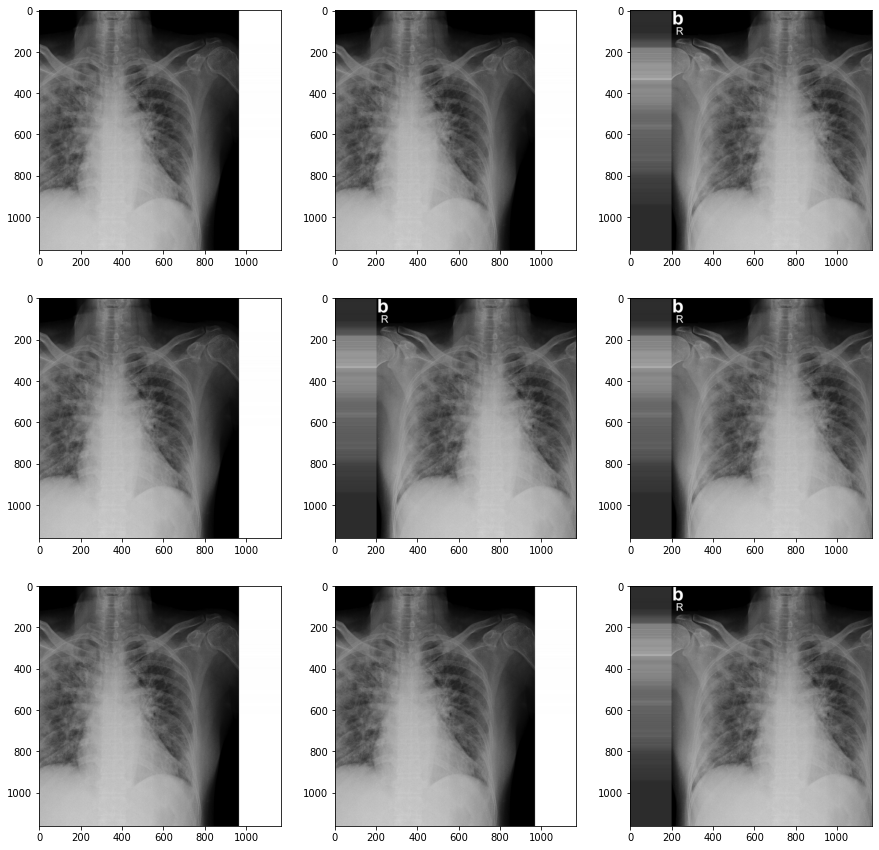

In [0]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from matplotlib import pyplot


data = img_to_array(img_COV2)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
f = plt.figure(figsize=(15,15))
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

5.2 **Vertical shift augmentation**

Este es desplazamiento de la imagen hacia arriba o hacia abajo. De la misma manera que el desplazamiento horizontal, en los lugares que están vacios se crean nuevos pixeles de tal manera que la imagen queda esos lugares difumadas.

Los parametros para ajustar en este caso  *height_shift_range* donde se debe especiifcar el rango o la proporción que se debe dezplazar.

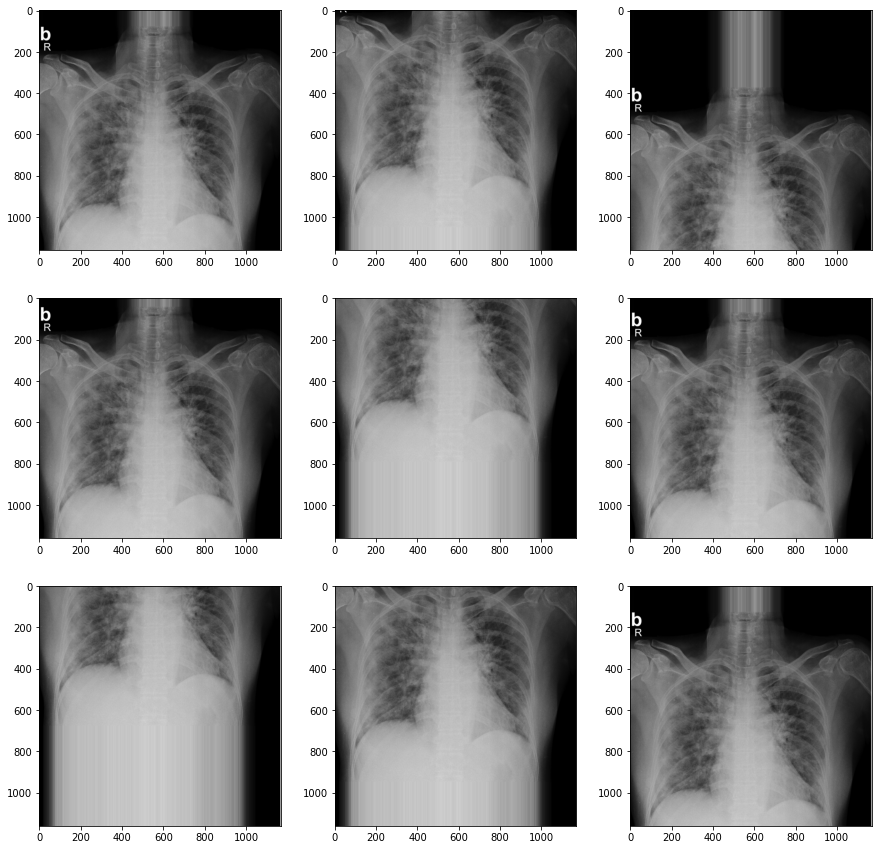

In [0]:

data = img_to_array(img_COV2)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
f = plt.figure(figsize=(15,15))
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

5.3 **Horizontal Flip Augmentation**

Esta tecnica se basa en invertir las filas o columnas de pixeles en el caso de un vertical u horizontal. 

Para el caso de las imagenes de la radiografias no tendria sentido una cambio de posición vertical ya que las lecturas las imagenes siempre tiene la misma dirección, la cabeza arriba.

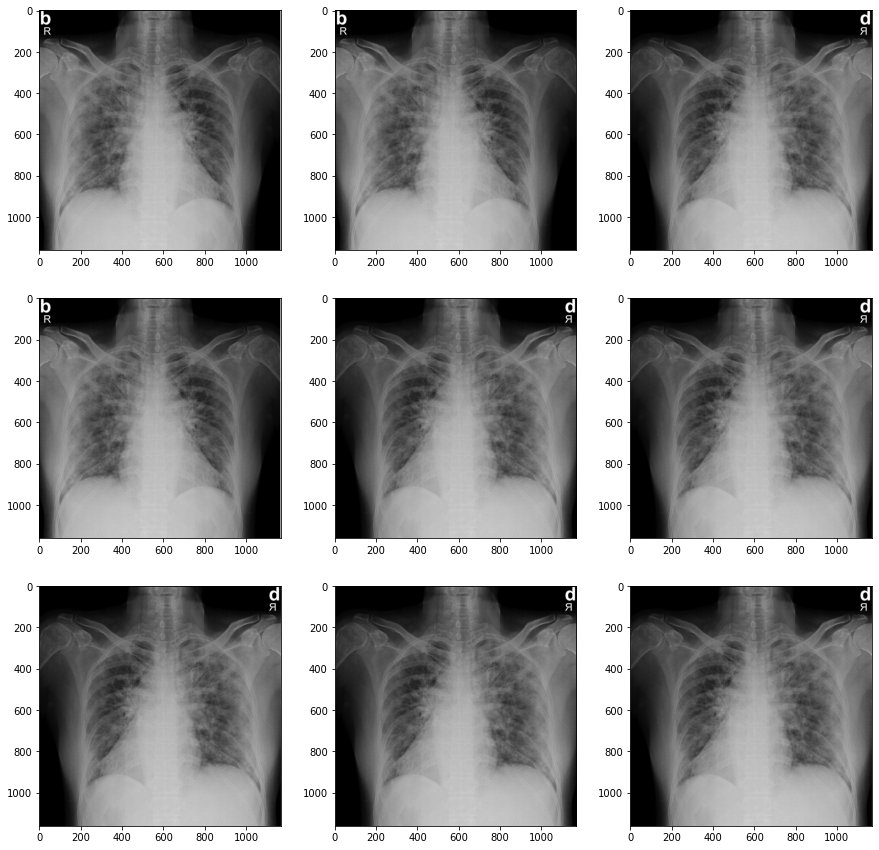

In [0]:

# convert to numpy array
data = img_to_array(img_COV2)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
f = plt.figure(figsize=(15,15))
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

5.4 **Random Rotation Augmentation**

Estes es un aumento de rotación gira aleatoriamente la imagen ene el sentidos de las agujas del reloj en un determinado de grados de 0 a 360 [10]. En algunos casos las rotaciones generará espacios en blanco.

Esta es una de las translaciones más importantes para el COVID 19 porque es frecuente que las imagenes de radioagrafia tiende a tener problemas de alineación, no son derechas.

El parametro para ajustar es *rotation_range* en donde se debe fijar el rango. En este caso es 90 grados. No tiene sentido tener rotaciones mayores pues la imagenes tiene un sentido, la cabeza siempre está arriba.


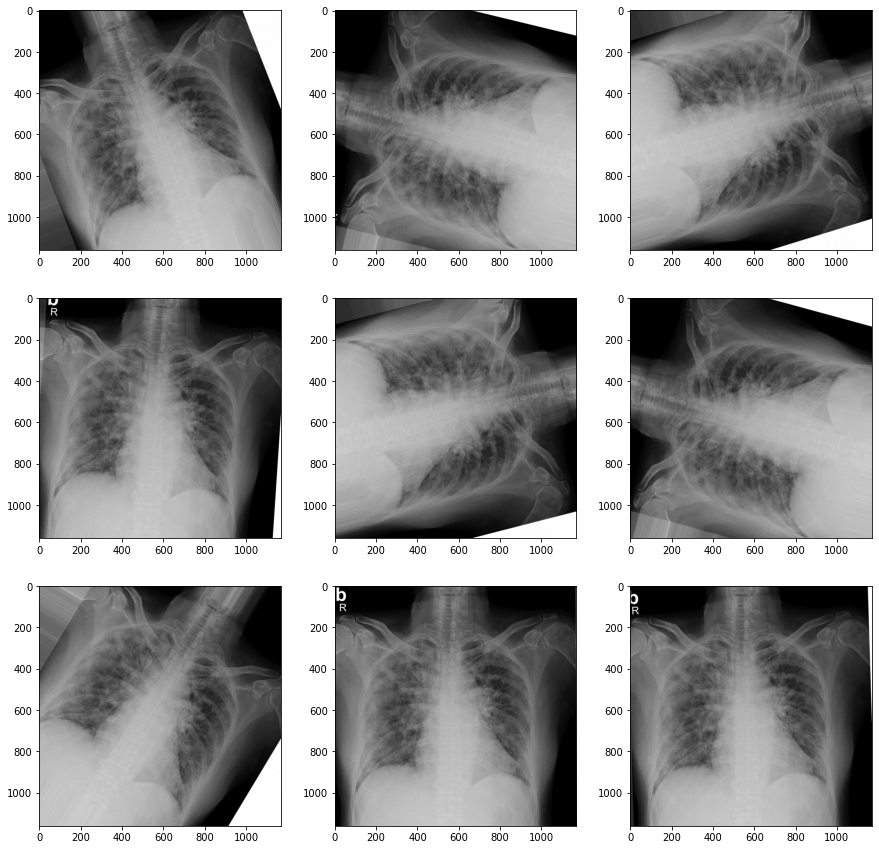

In [0]:

# convert to numpy array
data = img_to_array(img_COV2)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
f = plt.figure(figsize=(15,15))
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

5.5 **Random Brightness Augmentation**

Esta tecnica se basa en el brillo de la imagen, que se puede oscurecer o iluminar o ambas. La idea es permitir que un modelo generalice a traves de diferentes niveles de iluminación. 

De la misma manera que las anteriores tecnicas, es importante para este modelo pues reproduce problemas habituales de las imagenes debido a la calidad de las equipos para la toma de rayos X. 


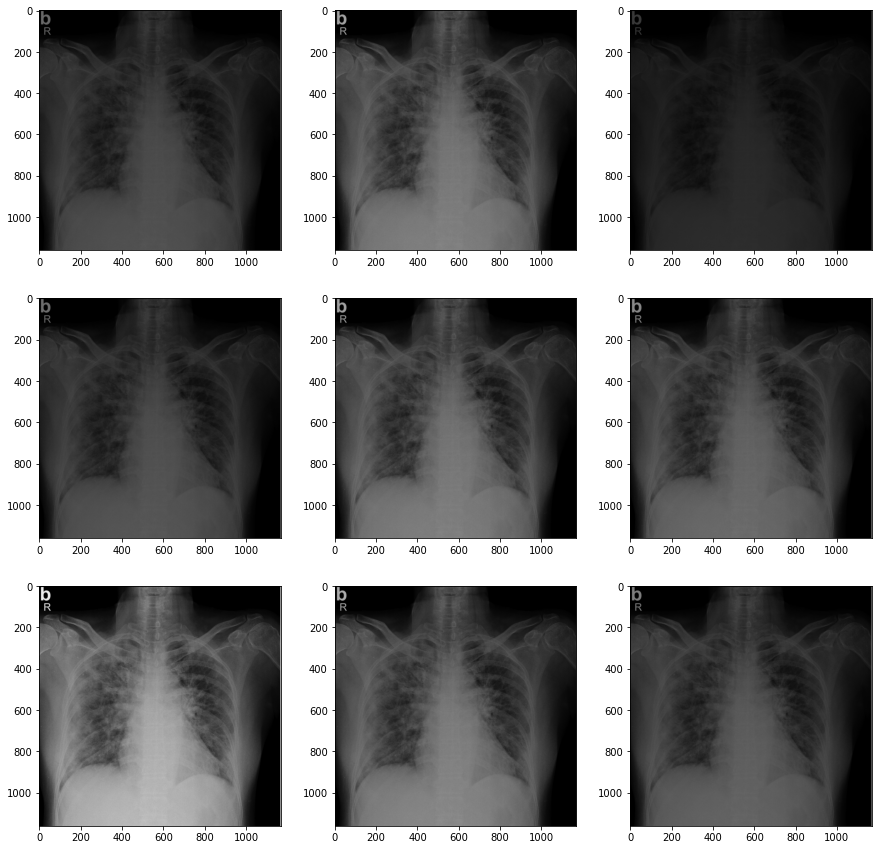

In [31]:

data = img_to_array(img_COV2)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
it = datagen.flow(samples, batch_size=1)
f = plt.figure(figsize=(15,15))
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

5.6 **Random Zoom Augmentation**

Esta tecnica amplia aleatoriamente la imagen y agrega nuevos valores de pixeles de alrededor de la imagen o interpola valores de píxeles respectivamente. Se especifica un valor tal manera que [1-valor, 1 + valor], luego si el valor es 0.3 entonces el rango es [0.7, 1.3]. Con este tecnica se puede diferenciar aspectos unicos en los pulmones que permiten diferenciarlos de los tres grupos.


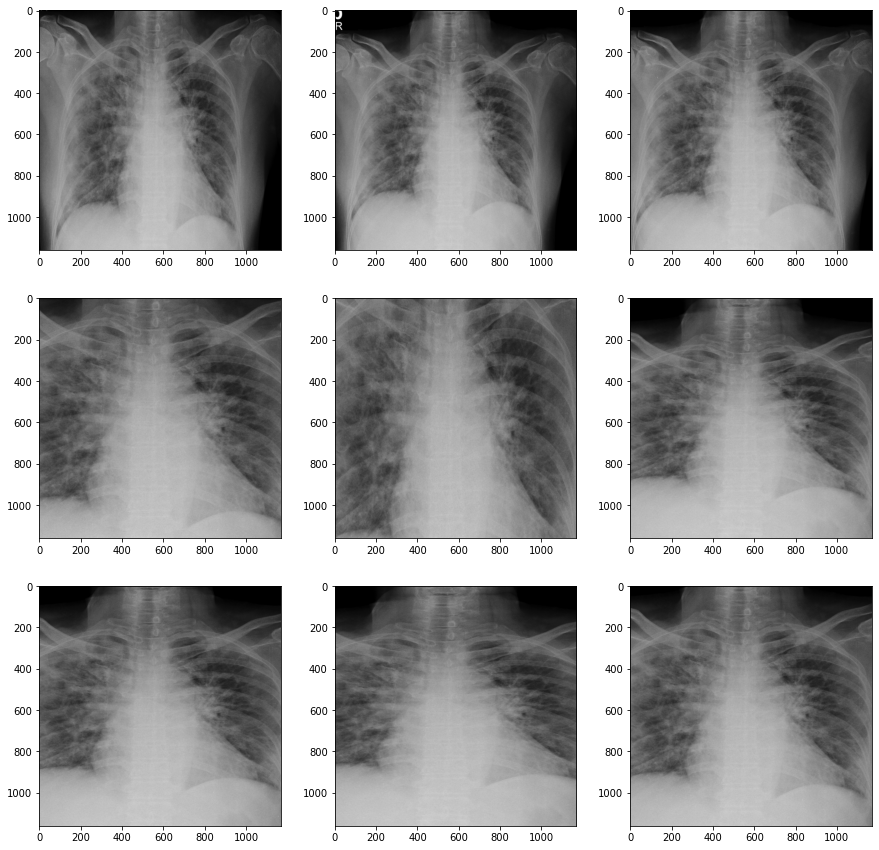

In [0]:

data = img_to_array(img_COV2)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
it = datagen.flow(samples, batch_size=1)

f = plt.figure(figsize=(15,15))
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
pyplot.show()

# Creación del modelo y métricas de evaluación (3 puntos)

En esta sección se tiene que desarrollar el *pipeline* para la creación y entrenamiento de el/los modelo/s.

Se trabajará con los datos de *training* y de *validación*.

Se deberán tener en cuenta aspectos como:
- El tipo de arquitectura más adecuado para el problema
- Las métricas que se deben utilizar para medir de forma correcta el comportamiento del modelo
- Visualizaciones de las curvas de entrenamiento/validación que ayuden a decidir cuál ha sido el mejor modelo.
- Considerar un modelo *baseline* para poder comparar las métricas (por ejemplo, utilizar predicciones aleatorias o utilizar un modelo muy sencillo, como por ejemplo una red con muy pocas capas)


## Solución

A continuación se presentará las soluciones para cada uno de los item anteriores:

- **El tipo de arquitectura más adecuado para el problema**

En medio de la pandemia se han comenzado a implementar herramientas de diferentes areas para ayudar a salir de esta crisis. En este caso, se han hecho varios aplicaciones de modelos de deep learning para la deteccion del COVID -19, por ejemplo, los articulos: DeepCOVIDExplainer: Explainable COVID-19 Predictions
Based on Chest X-ray Images (Karim, [11]) y On the limits of cross-domain
generalization in automated X-ray prediction (Cohen, [12]). En estos articulos, los mejores modelos para la detección COVID 19 son VGG-19 y DenseNet-161. Estos modelos se implemenatarán en esta practica.


- **Las métricas que se deben utilizar para medir de forma correcta el comportamiento del modelo**

Los métricas que se utilizará para medir el desempeño de los modelos presentados en esta practica son exactitud de clasificación (*classifiction accurancy*) que es la razon entre el número de correcta predicciones y el total de muestras.  Perdida logaritmica (*Logarithmic Loss*) funciona penalizando las clasificaciones malas. Y por ultimo es la confusión matrix, que es una matriz que describe en detalle el desempeño de la matriz.

- **Considerar un modelo baseline para poder comparar las métricas (por ejemplo, utilizar predicciones aleatorias o utilizar un modelo muy sencillo, como por ejemplo una red con muy pocas capas)**

En este caso se fija el modelo sencillo y luego se agregan más capas para volverlo más complejo.

**Modelo Baseline**

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

#train_generator.image_shape

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(200, 200, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Conv2D(32, (3, 3),padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


Epoch 1/10
125/125 [==============================] - 96s 767ms/step - loss: 0.8759 - accuracy: 0.5608 - val_loss: 0.7847 - val_accuracy: 0.5833
Epoch 2/10
125/125 [==============================] - 97s 772ms/step - loss: 0.4508 - accuracy: 0.7323 - val_loss: 1.4435 - val_accuracy: 0.6667
Epoch 3/10
125/125 [==============================] - 96s 766ms/step - loss: 0.3428 - accuracy: 0.8623 - val_loss: 0.9059 - val_accuracy: 0.8333
Epoch 4/10
125/125 [==============================] - 96s 771ms/step - loss: 0.2633 - accuracy: 0.9549 - val_loss: 1.0506 - val_accuracy: 0.7500
Epoch 5/10
125/125 [==============================] - 96s 766ms/step - loss: 0.3337 - accuracy: 0.9841 - val_loss: 1.7970 - val_accuracy: 0.7500
Epoch 6/10
125/125 [==============================] - 96s 765ms/step - loss: 0.2954 - accuracy: 0.9678 - val_loss: 1.9163 - val_accuracy: 0.7500
Epoch 7/10
125/125 [==============================] - 95s 763ms/step - loss: 0.7668 - accuracy: 0.9919 - val_loss: 1.4608 - val_ac

In [0]:
print(train_labels)

NameError: ignored

# Resultados y Conclusiones (3 puntos)

En esta sección se debe implementar la fase de test de los mejores modelos desarrollados anteriormente.

Se valorarán aspectos como:
- Razonamiento de qué arquitectura es la más adecuada
- Análisis cuantitativo y cualitativo de los resultados.

# *Explainability* (1 punto)

Investiga sobre las técnicas que se utilizan para entender las decisiones de una CNN. Por ejemplo, los [Class Activation Maps](https://arxiv.org/pdf/1512.04150.pdf) (CAM)[4] son una modificación en la arquitectura de una CNN de clasificación de imágenes que permite visualizar qué partes de la imagen se consideran para la clasificación de una muestra con una determinada etiqueta. Variaciones de las CAMs se han aplicado recientemente para entender el comportamiento de las redes para detectar Covid-19 [8].

Otro método es el popular [Deep Dream](https://deepdreamgenerator.com/)[11]. Este método, a parte de generar imágenes con un estilo artístico/psicodélico, sirve para entender el tipo de características que busca una red en la imagen de entrada para clasificarla con una determinada etiqueta.

Implementa alguna técnica de visualización para intentar entender las decisiones de la CNN entrenada.

# New Section

### Referencias

[1] https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

[2] https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/

[3] Deep Learning, principios y fundamentos. Anna Bosch Rué.

[4]. https://towardsdatascience.com/detection-of-covid-19-presence-from-chest-x-ray-scans-using-cnn-class-activation-maps-c1ab0d7c294b

[5] https://www.visualcapitalist.com/wp-content/uploads/2020/04/covid-19-affects-the-body.html

[6]https://www.lung.org/lung-health-diseases/lung-disease-lookup/pneumonia/learn-about-pneumonia

[7]https://www.quora.com/What-does-a-healthy-lung-look-like-in-an-X-ray-of-a-50-year-old

[8]https://my.clevelandclinic.org/health/diseases/4471-pneumonia


[9]http://www.scielo.mec.pt/scielo.php?script=sci_arttext&pid=S1646-98952019000400005&lng=pt&nrm=iso#:~:text=Las%20t%C3%A9cnicas%20de%20data%20augmentation,a%20la%20complejidad%20del%20modelo.

[10] https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

[11] Md. Rezaul Karim, DeepCOVIDExplainer: Explainable COVID-19 Predictions
Based on Chest X-ray Images

[12]Joseph Paul Cohen, On the limits of cross-domain generalization in automated X-ray prediction